# Run all cells to generate the figures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

# Flow Data

In [2]:
L = 0.5
D = 0.01
u = 0
u_e = 1

Re = 63.6
rho = 0.002377

mu = (rho * u_e * D) / Re

In [3]:
mu

3.7374213836477986e-07

# Grid Data

In [4]:
Nx = 21
Ny = 11

dt = 0.001
dx = L / (Nx-1)
dy = D / (Ny-1)

K = 300
M = 200
sigma = 0.1

# Helpful Functions

In [5]:
def initialize(Nx, Ny, u_e):

    P = np.zeros((Nx, Ny))
    U = np.zeros((Nx+1, Ny))
    V = np.zeros((Nx+2, Ny+1))

    U[:, -1] = u_e
    V[14, 4] = u_e/2

    Pbar = np.zeros_like(P)

    return P, U, V, Pbar

def calculate_A(u, v, i, j):

    vbar = 0.5*(v[i+1, j+1] + v[i+2, j+1])
    vbarbar = 0.5*(v[i+1, j] + v[i+2, j])

    p1 = -((0.5/dx)*(rho*u[i+2, j]**2 - rho*u[i, j]**2) + (0.5/dy)*(rho*u[i+1, j+1]*vbar - rho*u[i+1, j-1]*vbarbar)) 
    p2 = mu*((1/dx**2)*(u[i+2, j] - 2*u[i+1, j] + u[i, j]) + (1/dy**2)*(u[i+1, j+1] - 2*u[i+1, j] + u[i+1, j-1]))
    Astar = p1 + p2

    return Astar

def xmomentum(u, p, i, j, Astar):

    val = rho*u[i+1, j] + Astar*dt - (dt/dx)*(p[i+1, j] - p[i, j])

    return val

def calculate_B(u, v, i, j):

    ubar = 0.5*(u[i+1, j] + u[i+1, j+1])
    ubarbar = 0.5*(u[i, j] + u[i, j+1])

    p1 = -((0.5/dx)*(rho*v[i+2, j+1]*ubar - rho*v[i, j+1]*ubarbar) + (0.5/dy)*(rho*v[i+1, j+2]**2 - rho*v[i+1, j]**2))
    p2 = mu*((1/dx**2)*(v[i+2, j+1] - 2*v[i+1, j+1] + v[i, j+1]) + (1/dy**2)*(v[i+1, j+2] - 2*v[i+1, j+1] + v[i+1, j]))
    Bstar = p1 + p2

    return Bstar

def ymomentum(v, p, i, j, Bstar):

    val = rho*v[i+1, j+1] + Bstar*dt - (dt/dy)*(p[i, j+1] - p[i, j])

    return val

def correction(u, v, i, j, pc):
    a = 2*((dt/dx**2) + (dt/dy**2))
    b = -dt/dx**2
    c = -dt/dy**2
    d = (1/dx)*(rho*u[i+1, j] - rho*u[i, j]) + (1/dy)*(rho*v[i+1, j+1] - rho*v[i+1, j])

    val = -(b*pc[i+1, j] + b*pc[i-1, j] + c*pc[i, j+1] + c*pc[i, j-1] + d) / a

    return val, d

def BC_UV(U, V):

    U[0, 1:-1] = U[1, 1:-1]
    U[-1, 1:-1] = U[-2, 1:-1]
    V[-1, 1:-1] = V[-2, 1:-1]

    return U, V

def BC_P(P):

    P[1:-1, -1] = P[1:-1, -2]
    P[1:-1, 0] = P[1:-1, 1]

    return P

# Main Loop

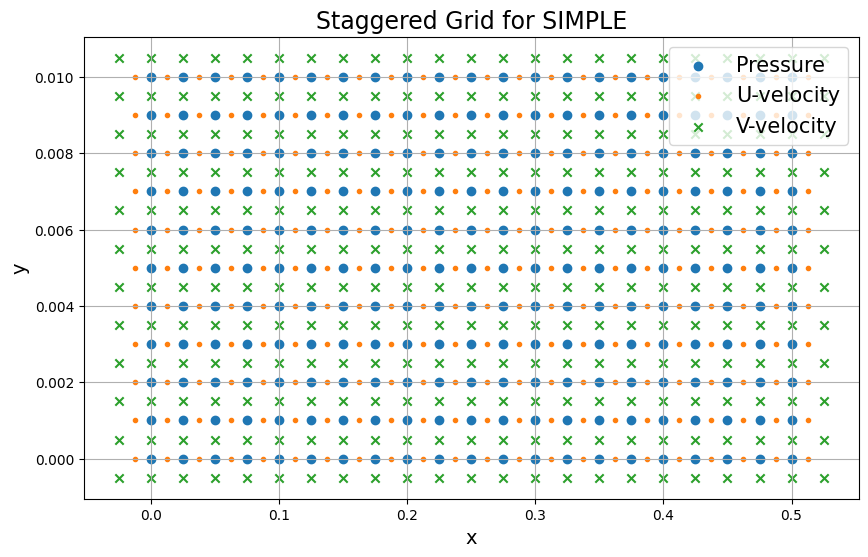

In [12]:
P, U, V, Pbar = initialize(Nx, Ny, u_e)

x_P, y_P = np.meshgrid(np.linspace(0, L, Nx), np.linspace(0, D, Ny))
x_U, y_U = np.meshgrid(np.linspace(-dx/2, L+dx/2, Nx+1), np.linspace(0, D, Ny))
x_V, y_V = np.meshgrid(np.linspace(-dx, L+dx, Nx+2), np.linspace(-dy/2, D+dy/2, Ny+1))

plt.figure(figsize=(10, 6))
plt.scatter(x_P, y_P, label='Pressure', marker='o')
plt.scatter(x_U, y_U, label='U-velocity', marker='.')
plt.scatter(x_V, y_V, label='V-velocity', marker='x')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Staggered Grid for SIMPLE', fontsize=17)
plt.legend(fontsize=15)
plt.box(True)
plt.grid(True)
plt.show()

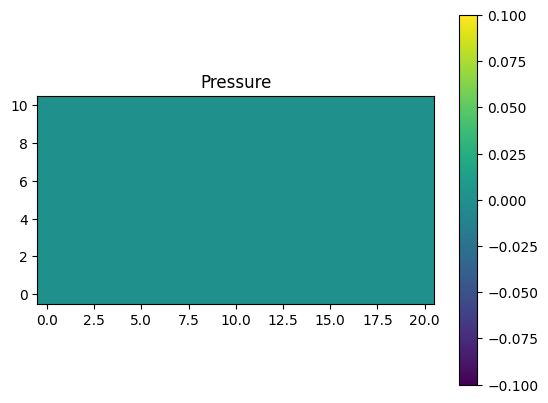

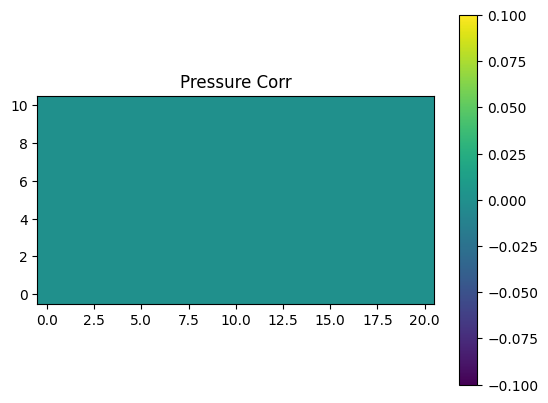

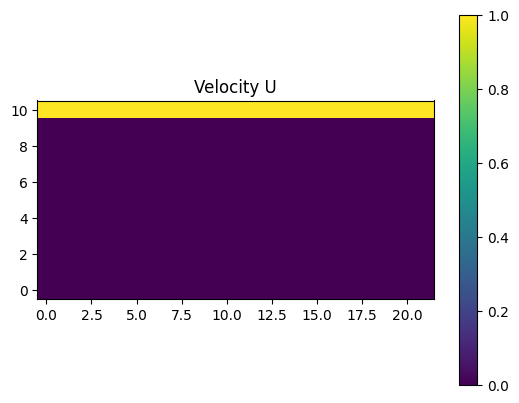

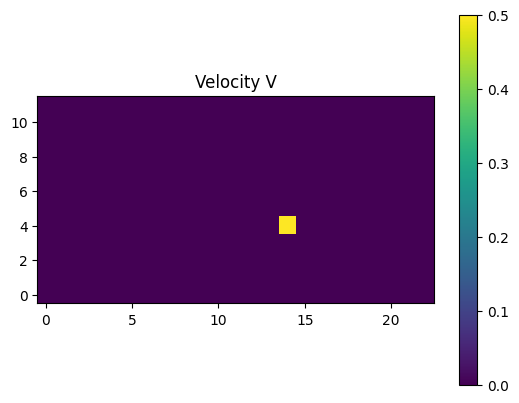

Iteration #  0
Iteration #  1
Iteration #  2
Iteration #  3
Iteration #  4
Iteration #  5
Iteration #  6
Iteration #  7
Iteration #  8
Iteration #  9
Iteration #  10
Iteration #  11
Iteration #  12
Iteration #  13
Iteration #  14
Iteration #  15
Iteration #  16
Iteration #  17
Iteration #  18
Iteration #  19
Iteration #  20
Iteration #  21
Iteration #  22
Iteration #  23
Iteration #  24
Iteration #  25
Iteration #  26
Iteration #  27
Iteration #  28
Iteration #  29
Iteration #  30
Iteration #  31
Iteration #  32
Iteration #  33
Iteration #  34
Iteration #  35
Iteration #  36
Iteration #  37
Iteration #  38
Iteration #  39
Iteration #  40
Iteration #  41
Iteration #  42
Iteration #  43
Iteration #  44
Iteration #  45
Iteration #  46
Iteration #  47
Iteration #  48
Iteration #  49
Iteration #  50
Iteration #  51
Iteration #  52
Iteration #  53
Iteration #  54
Iteration #  55
Iteration #  56
Iteration #  57
Iteration #  58
Iteration #  59
Iteration #  60
Iteration #  61
Iteration #  62
It

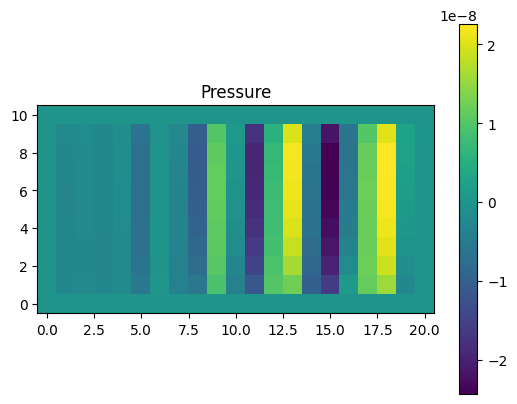

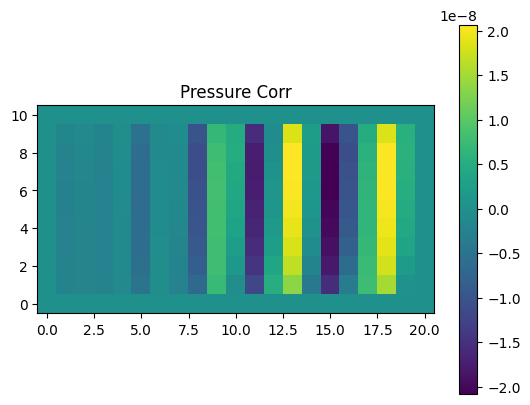

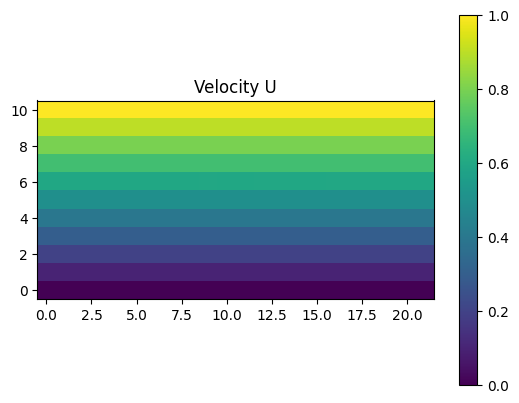

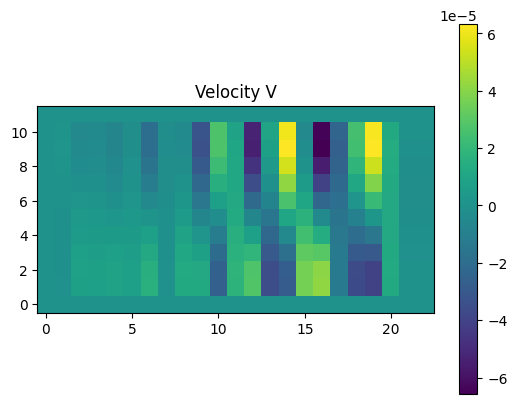

In [7]:
P, U, V, Pbar = initialize(Nx, Ny, u_e)

X, Y, Z = [], [], []

plt.imshow(P.T, origin='lower')
plt.title("Pressure")
plt.colorbar()
plt.show()
plt.imshow(Pbar.T, origin='lower')
plt.title("Pressure Corr")
plt.colorbar()
plt.show()
plt.imshow(U.T, origin='lower')
plt.title("Velocity U")
plt.colorbar()
plt.show()
plt.imshow(V.T, origin='lower')
plt.title("Velocity V")
plt.colorbar()
plt.show()

for n in range(0, K):

    if n == 3 or n == 19 or n == 49 or n == 149 or n == 299:

        X.append(copy.deepcopy(U[14,:]))

    if n == 0 or n == 1 or n == 3 or n == 49:

        Y.append(copy.deepcopy(V[14,:]))


    print(f"Iteration # ", n)

    for i in range(0, Nx-1):
        for j in range(1, Ny-1):
            U[i+1, j] = xmomentum(U, P, i, j, calculate_A(U, V, i, j)) / rho

    for i in range(0, Nx):
        for j in range(0, Ny-1):
            V[i+1, j+1] = ymomentum(V, P, i, j, calculate_B(U, V, i, j)) / rho

    U, V = BC_UV(U, V)

    for m in range(0, M):
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                Pbar[i, j], d = correction(U, V, i, j, Pbar)
                if i == 14 and j == 4 and m == M-1:
                    Z.append(d)


    P = P + sigma*(Pbar-P)

#    P = BC_P(P)

    if n == 299:
        plt.imshow(P.T, origin='lower')
        plt.title("Pressure")
        plt.colorbar()
        plt.show()
        plt.imshow(Pbar.T, origin='lower')
        plt.title("Pressure Corr")
        plt.colorbar()
        plt.show()
        plt.imshow(U.T, origin='lower')
        plt.title("Velocity U")
        plt.colorbar()
        plt.show()
        plt.imshow(V.T, origin='lower')
        plt.title("Velocity V")
        plt.colorbar()
        plt.show()


In [8]:
y1 = np.linspace(0, D, Ny)
y2 = np.linspace(-dy/2, D+dy/2, Ny+1)

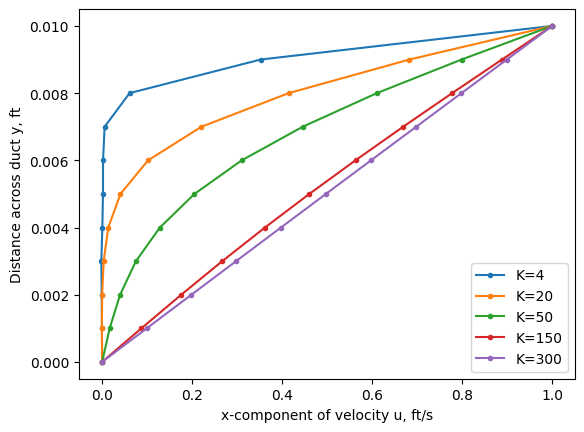

In [9]:
plt.plot(X[0], y1, '.-')
plt.plot(X[1], y1, '.-')
plt.plot(X[2], y1, '.-')
plt.plot(X[3], y1, '.-')
plt.plot(X[4], y1, '.-')
plt.xlabel('x-component of velocity u, ft/s')
plt.ylabel('Distance across duct y, ft')
plt.legend(['K=4', 'K=20', 'K=50', 'K=150', 'K=300'])


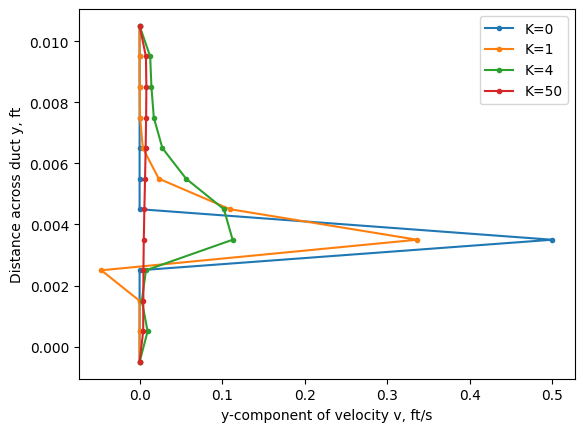

In [10]:
plt.plot(Y[0], y2, '.-')
plt.plot(Y[1], y2, '.-')
plt.plot(Y[2], y2, '.-')
plt.plot(Y[3], y2, '.-')
plt.xlabel('y-component of velocity v, ft/s')
plt.ylabel('Distance across duct y, ft')
plt.legend(['K=0', 'K=1', 'K=4', 'K=50'])


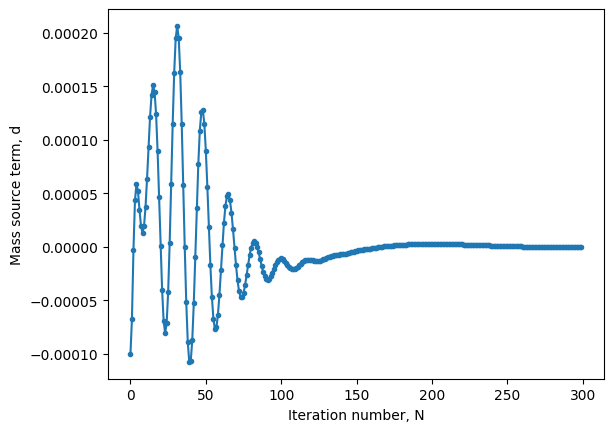

In [11]:
plt.plot(Z, '.-')
plt.xlabel('Iteration number, N')
plt.ylabel('Mass source term, d')
plt.show()